<a href="https://colab.research.google.com/github/shox21512/shox/blob/master/Customer_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# K means algorithm

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
url="https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/customer_segmentation.csv"
df = pd.read_csv(url)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [4]:
df.drop('Address', axis=1, inplace=True)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [5]:
# Normalization. Customer Id ustunidan boshqa barcha ustunlarni normalizasiya qilamiz.

In [6]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
norm_data = StandardScaler().fit_transform(X)
norm_data

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

In [7]:
# Model

In [8]:
k = 3
k_means = KMeans(n_clusters = k) # init va n_init standart qiymatlarni qabul qiladi, biz faqat klasterlar sonini ko'rsatdik.
k_means.fit(norm_data)
print(k_means.labels_)

[1 2 0 1 2 2 1 1 1 2 0 1 1 1 0 1 1 1 2 1 1 1 0 2 2 1 1 1 1 1 1 2 0 1 1 1 0
 0 1 2 0 2 1 2 1 2 1 1 1 1 2 2 0 1 0 0 0 1 1 1 2 1 2 2 1 1 1 0 1 0 1 1 1 1
 1 1 1 1 2 1 1 0 2 1 2 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 2 1 0 0 2 1 1 1 1 1
 1 1 0 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 2 1 1 0
 1 1 1 2 0 1 1 1 1 2 0 0 1 2 1 1 1 1 1 1 1 1 2 1 1 0 1 0 1 1 0 2 0 1 1 2 0
 2 1 1 1 1 1 2 1 0 1 1 1 2 2 1 2 1 0 1 1 0 1 2 1 0 1 1 1 1 1 0 0 2 1 1 0 2
 1 1 1 1 2 1 1 0 1 1 1 1 2 1 1 0 2 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 2 0 1 0 1
 1 1 2 1 0 2 0 1 2 1 1 0 1 1 1 1 0 0 0 1 1 1 2 1 1 2 1 2 1 1 2 1 1 1 0 1 1
 0 1 0 2 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 2 1 0 1 1 1 0 0 1 1 1 2 0
 1 1 0 1 2 1 1 1 1 1 0 2 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 2 0 1 0 1 1 1 2 2 1
 0 1 2 0 0 1 1 1 0 1 1 1 1 1 2 1 2 1 1 1 1 0 1 0 1 1 1 2 1 1 1 1 0 1 1 0 0
 2 1 1 1 1 1 0 0 1 2 0 2 1 1 0 1 1 2 2 1 0 1 1 2 1 0 1 2 1 1 1 2 1 1 1 1 2
 1 0 1 1 1 1 2 0 1 1 2 1 0 1 1 2 1 2 1 1 1 1 1 1 1 2 2 1 1 2 1 0 1 1 1 0 1
 0 1 1 1 1 1 2 0 0 1 2 1 

In [10]:
# Customers are seperated to Clusters and now we add them to our Dataframe.

In [11]:
df['cluster'] = k_means.labels_
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster
0,1,41,2,6,19,0.124,1.073,0.0,6.3,1
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,1
4,5,47,1,31,253,9.308,8.908,0.0,7.2,2


In [12]:
df.groupby('cluster').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
cluster,,,,,,,,,
0,424.451807,31.891566,1.861446,3.963855,31.789157,1.576675,2.843355,0.993939,13.994578
1,426.122905,33.817505,1.603352,7.625698,36.143389,0.853128,1.816855,0.000000,7.964991
2,424.408163,43.000000,1.931973,17.197279,101.959184,4.220673,7.954483,0.162393,13.915646


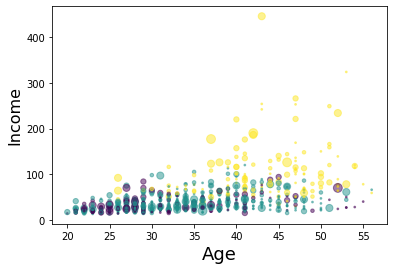

In [13]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=k_means.labels_.astype(float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

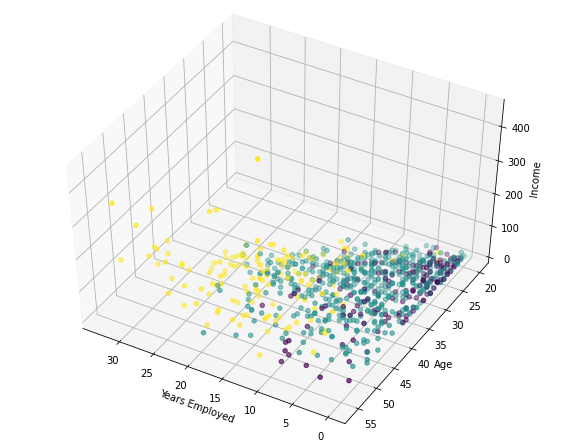

In [14]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=120)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Years Employed')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 2], X[:, 0], X[:, 3], c= k_means.labels_.astype(float))